In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets.california_housing import fetch_california_housing #Bostan Housing prices
%matplotlib inline

In [22]:
df=fetch_california_housing()  #Fetching the housing data 

In [23]:
print(fetch_california_housing().DESCR)  
#prints the description of the dataset
#Here we come to know what is the dataset about and what is the target feature.
#Target Feature is median house value

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [24]:
type(df)                    
#here we observe that the data type of the dataset is not as needed 
#so we need to convert it to dataframe 

sklearn.utils.Bunch

In [25]:
df.data           #fetches only the data not the index or columns.

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [26]:
type(df.data)
#the data in the dataset is in the form of n-dimensional array 

numpy.ndarray

In [27]:
df.feature_names              #Following are the features in the dataset excluding the target feature.

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [28]:
df.target                       #These are the corressponding values in target feature.

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [29]:
df=pd.DataFrame(df.data,columns=df.feature_names)           #Converting to DataFrame 

# Statistical Analysis and Data Exploration

In [30]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [31]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [32]:
df.shape

(20640, 8)

In [33]:
len(df)

20640

In [34]:
df.size

165120

In [35]:
df.ndim

2

In [36]:
df.dtypes                    #All the features are of float type

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [37]:
df.isnull().sum().sum()        #No null values present in the dataset

0

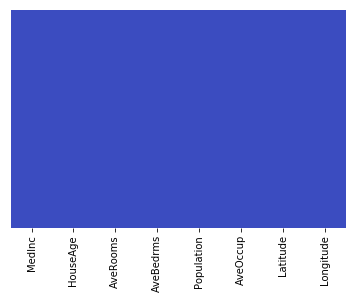

In [38]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm") #Represents the null values in data set for each feature

# Preprocessing The Data to suitable form

In [55]:
x=df                              #Seperating the independent Features
x=x.drop("MedHouseVal",axis=1)
df1=fetch_california_housing()
y=pd.DataFrame(df1.target,columns=["MedHouseVal"])        #Seperating the dependent feature
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [56]:
df['MedHouseVal']=y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


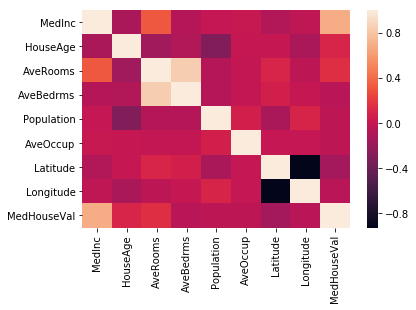

In [85]:
sns.heatmap(df.corr())           
#This plots the dependency of each attribute on every other attribute i.e. it plots the correlation.
#We observe that median house value is highly dependent on the Median income 
#which means that people with high income purchase high price houses

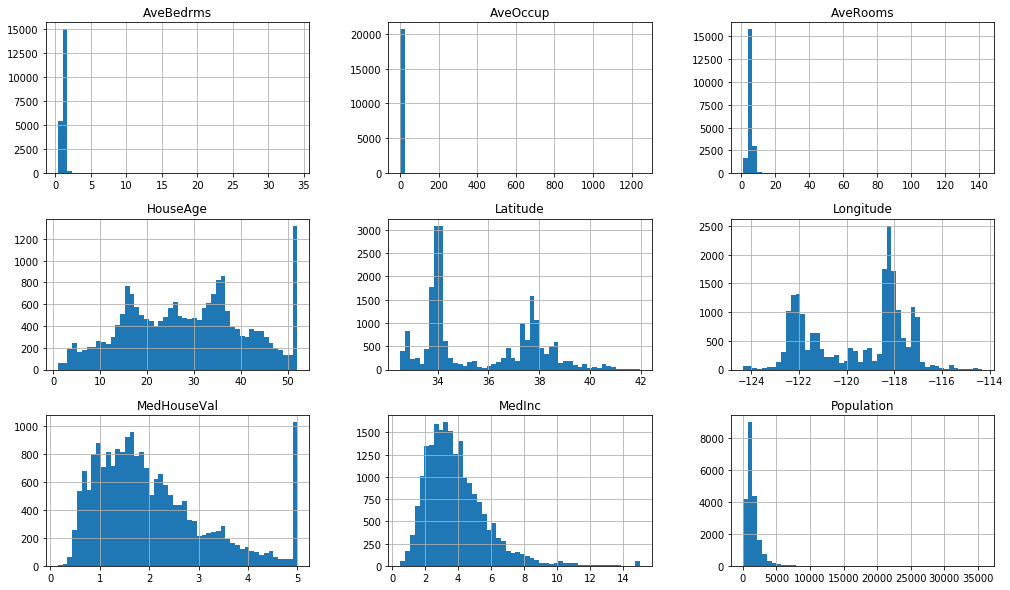

In [87]:
df.hist(bins=50, figsize=(17,10))
plt.show()

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=150) 
#Here we split the dataset into 30% testing and 70% training set

In [58]:
x_train.shape

(14448, 8)

In [59]:
x_test.shape

(6192, 8)

In [60]:
y_train.shape

(14448, 1)

In [61]:
y_test.shape

(6192, 1)

In [62]:
df.shape

(20640, 9)

In [63]:
df.corr

<bound method DataFrame.corr of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7      3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8      2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9      3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
10     3.2031      52.0  5.477612   1.079602       910.0  2.263682     37.85   
11     3

In [64]:
from sklearn.linear_model import LinearRegression #importing LinearRegression model from sklearn lib.
lr=LinearRegression()

In [65]:
lr.fit(x_train,y_train)                      
#Fitting the training set into the LR model
#This will create a model from training set. All the necessary parameters and the equation is prepared in this model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
p = lr.predict(x_test)          #Predicting using the model built by applying the test set to it.

In [67]:
len(p)

6192

In [68]:
from sklearn.metrics import r2_score,adjusted_rand_score
r_squared=r2_score(p,y_test) #Returns the accuracy
r_squared
#Here we observe that the accuracy is quite low 
#which means the model we have designed is not as per the expectations

0.35815509168104165

As the linear regression model has low accuracy which indicates non-linear nature. The graph may be curvy in nature. So we will use polynomial regression<br>
In **polynomial regression**, the dependent variable y is represented as nth degree of independent variable x.This will easily fit the curvy nature of the plot of the relationship between x and y

In [69]:
from sklearn.preprocessing import PolynomialFeatures #importing Polynomial Regression model

poly = PolynomialFeatures(degree = 2)  #Forming the object for 2 degree model

In [70]:
xp = poly.fit_transform(x)  
x_train,x_test,y_train,y_test=train_test_split(xp,y,test_size=0.3,random_state=150)

In [71]:
poly.fit(x_train,y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [72]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
p=lr.predict(x_test)

In [74]:
from sklearn.metrics import r2_score,adjusted_rand_score
r_squared=r2_score(p,y_test) #Returns the accuracy
r_squared

0.5350277482938857